In [1]:
import os
from datasets import *
from nets import *

device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
print(f"device: {device}")

device: cpu


In [2]:
with open('.//_Data/colab_dataset.pkl', 'rb') as f:
    full_dataset = pickle.load(f)

fold = 2
tds = HASYv2Dataset()
vds = HASYv2Dataset()
tds.cross_val(fold, True, full_dataset)
vds.cross_val(fold, False, full_dataset)
tds.to(device)
vds.to(device)
print(tds.device, vds.device)
print(len(tds), len(vds))
del full_dataset    # In order to avoid using all of the available memory

cpu cpu
151288 16945


In [ ]:
# with open('.//_Reports/TwoLayerTest1 - 2021-11-12 16_34_06.229661/best_model.pkl', 'rb') as f:
#     model = pickle.load(f)

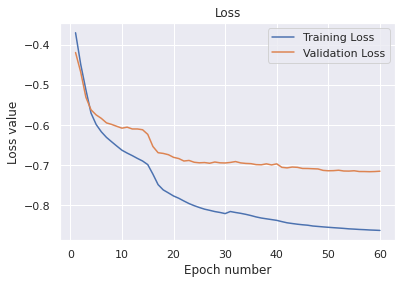

In [ ]:
# model.trainclass.plot()

Report "FourLayerGPU" already exists, creating a new name: FourLayerGPU - 2024-09-22 20_38_08.952345


/Users/arochaaz/Programming/GitHub/CNN-Project/training.py:462: FutureWarning: "file_name" may become deprecated in the future
  warn('"file_name" may become deprecated in the future',


1. Training loss: -0.2295
	Training accuracy: 23.06%
1. Validation loss: -0.2774
	Validation accuracy: 27.85%


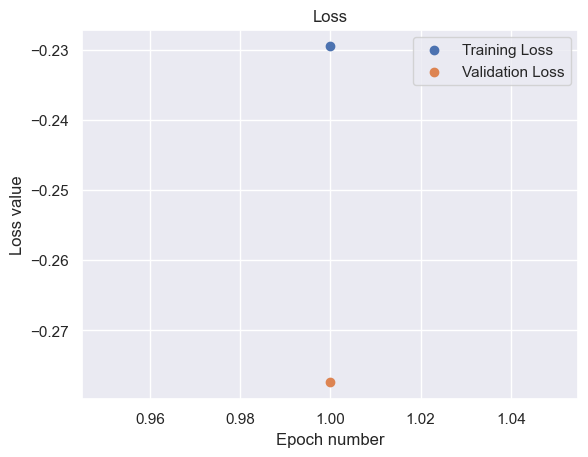

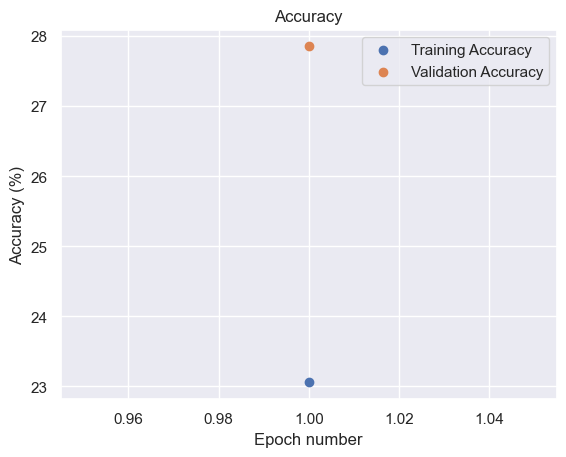

Time for running function train_model:
0.0 hours, 18.0 minutes and 50.68037509918213 seconds


In [3]:
from training import *
model = FourLayer(dirname='FourLayerGPU')
tdl = DataLoader(tds, batch_size = 1, shuffle=True)
vdl = DataLoader(vds, batch_size = 10000)
train_model(model, 1, 1e-4, nn.NLLLoss(), (tdl, vdl))

In [ ]:
train_model(model, 1, 1e-4, nn.NLLLoss(), (tdl, vdl))

/Users/arochaaz/Programming/GitHub/CNN-Project/training.py:462: FutureWarning: "file_name" may become deprecated in the future
  warn('"file_name" may become deprecated in the future',


1. Training loss: -0.8665
	Training accuracy: 86.68%
1. Validation loss: -0.7169
	Validation accuracy: 72.28%
2. Training loss: -0.8669
	Training accuracy: 86.73%
2. Validation loss: -0.7166
	Validation accuracy: 72.23%
3. Training loss: -0.8673
	Training accuracy: 86.76%
3. Validation loss: -0.7164
	Validation accuracy: 72.33%
4. Training loss: -0.8675
	Training accuracy: 86.78%
4. Validation loss: -0.7165
	Validation accuracy: 72.29%
5. Training loss: -0.8678
	Training accuracy: 86.81%
5. Validation loss: -0.7157
	Validation accuracy: 72.12%
6. Training loss: -0.8682
	Training accuracy: 86.84%
6. Validation loss: -0.7178
	Validation accuracy: 72.30%
7. Training loss: -0.8684
	Training accuracy: 86.86%
7. Validation loss: -0.7158
	Validation accuracy: 72.26%
8. Training loss: -0.8687
	Training accuracy: 86.90%
8. Validation loss: -0.7167
	Validation accuracy: 72.28%
9. Training loss: -0.8689
	Training accuracy: 86.92%
9. Validation loss: -0.7172
	Validation accuracy: 72.30%
10. Traini

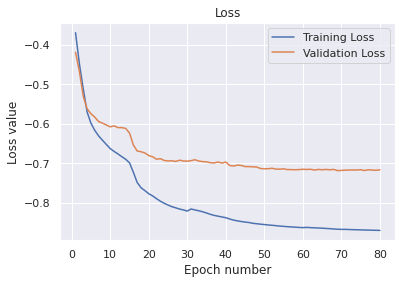

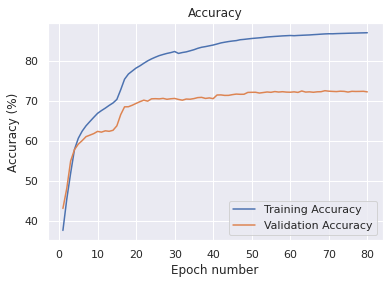

Time for running function train_model:
0.0 hours, 9.0 minutes and 58.28594446182251 seconds


In [ ]:
train_model(model, 10, 1e-4, nn.NLLLoss(), (tdl, vdl))